# Step 1: Data Loading And Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('auto_train.csv')

In [3]:
df.head(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,172677,40-64,male,minority,10-19y,high school,upper class,0.680579,1.0,before 2015,0.0,1.0,10238,10000.0,sedan,1,1,3,0.0
1,441183,26-39,female,majority,10-19y,high school,middle class,0.578909,1.0,before 2015,0.0,1.0,10238,9000.0,sports car,0,1,1,0.0
2,514238,65+,male,majority,20-29y,high school,middle class,0.476437,1.0,after 2015,1.0,1.0,32765,9000.0,sedan,5,2,1,0.0
3,255325,26-39,female,majority,10-19y,university,upper class,0.788963,1.0,before 2015,1.0,1.0,10238,8000.0,sedan,0,0,2,0.0
4,981782,40-64,female,majority,10-19y,high school,middle class,NaN,0.0,after 2015,0.0,0.0,10238,14000.0,sedan,0,1,0,0.0


In [4]:
df = df.drop('ID', axis=1)

In [5]:
df.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           710
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         702
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [6]:
df['CREDIT_SCORE'] = df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].median())
df['ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].median())

In [7]:
df = pd.get_dummies(df, columns=['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'VEHICLE_TYPE'], drop_first=True)

In [8]:
df.columns

Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME', 'AGE_26-39', 'AGE_40-64', 'AGE_65+',
       'GENDER_male', 'RACE_minority', 'DRIVING_EXPERIENCE_10-19y',
       'DRIVING_EXPERIENCE_20-29y', 'DRIVING_EXPERIENCE_30y+',
       'EDUCATION_none', 'EDUCATION_university', 'INCOME_poverty',
       'INCOME_upper class', 'INCOME_working class',
       'VEHICLE_YEAR_before 2015', 'VEHICLE_TYPE_sports car'],
      dtype='object')

&emsp;

&emsp;

&emsp;

# Step 2: Exploratory Data Analysis (EDA)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000,7000.000000,7000.000000
mean,0.518437,0.704571,0.493000,0.691857,19744.438429,11749.714286,1.47900,0.240143,1.046286,0.308429
std,0.130453,0.456268,0.499987,0.461759,18783.385235,2693.504207,2.21881,0.553899,1.642024,0.461878
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.00000,0.000000,0.000000,0.000000
25%,0.432881,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.00000,0.000000,0.000000,0.000000
50%,0.527002,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.00000,0.000000,0.000000,0.000000
75%,0.609557,1.000000,1.000000,1.000000,32765.000000,13000.000000,2.00000,0.000000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.00000,6.000000,12.000000,1.000000


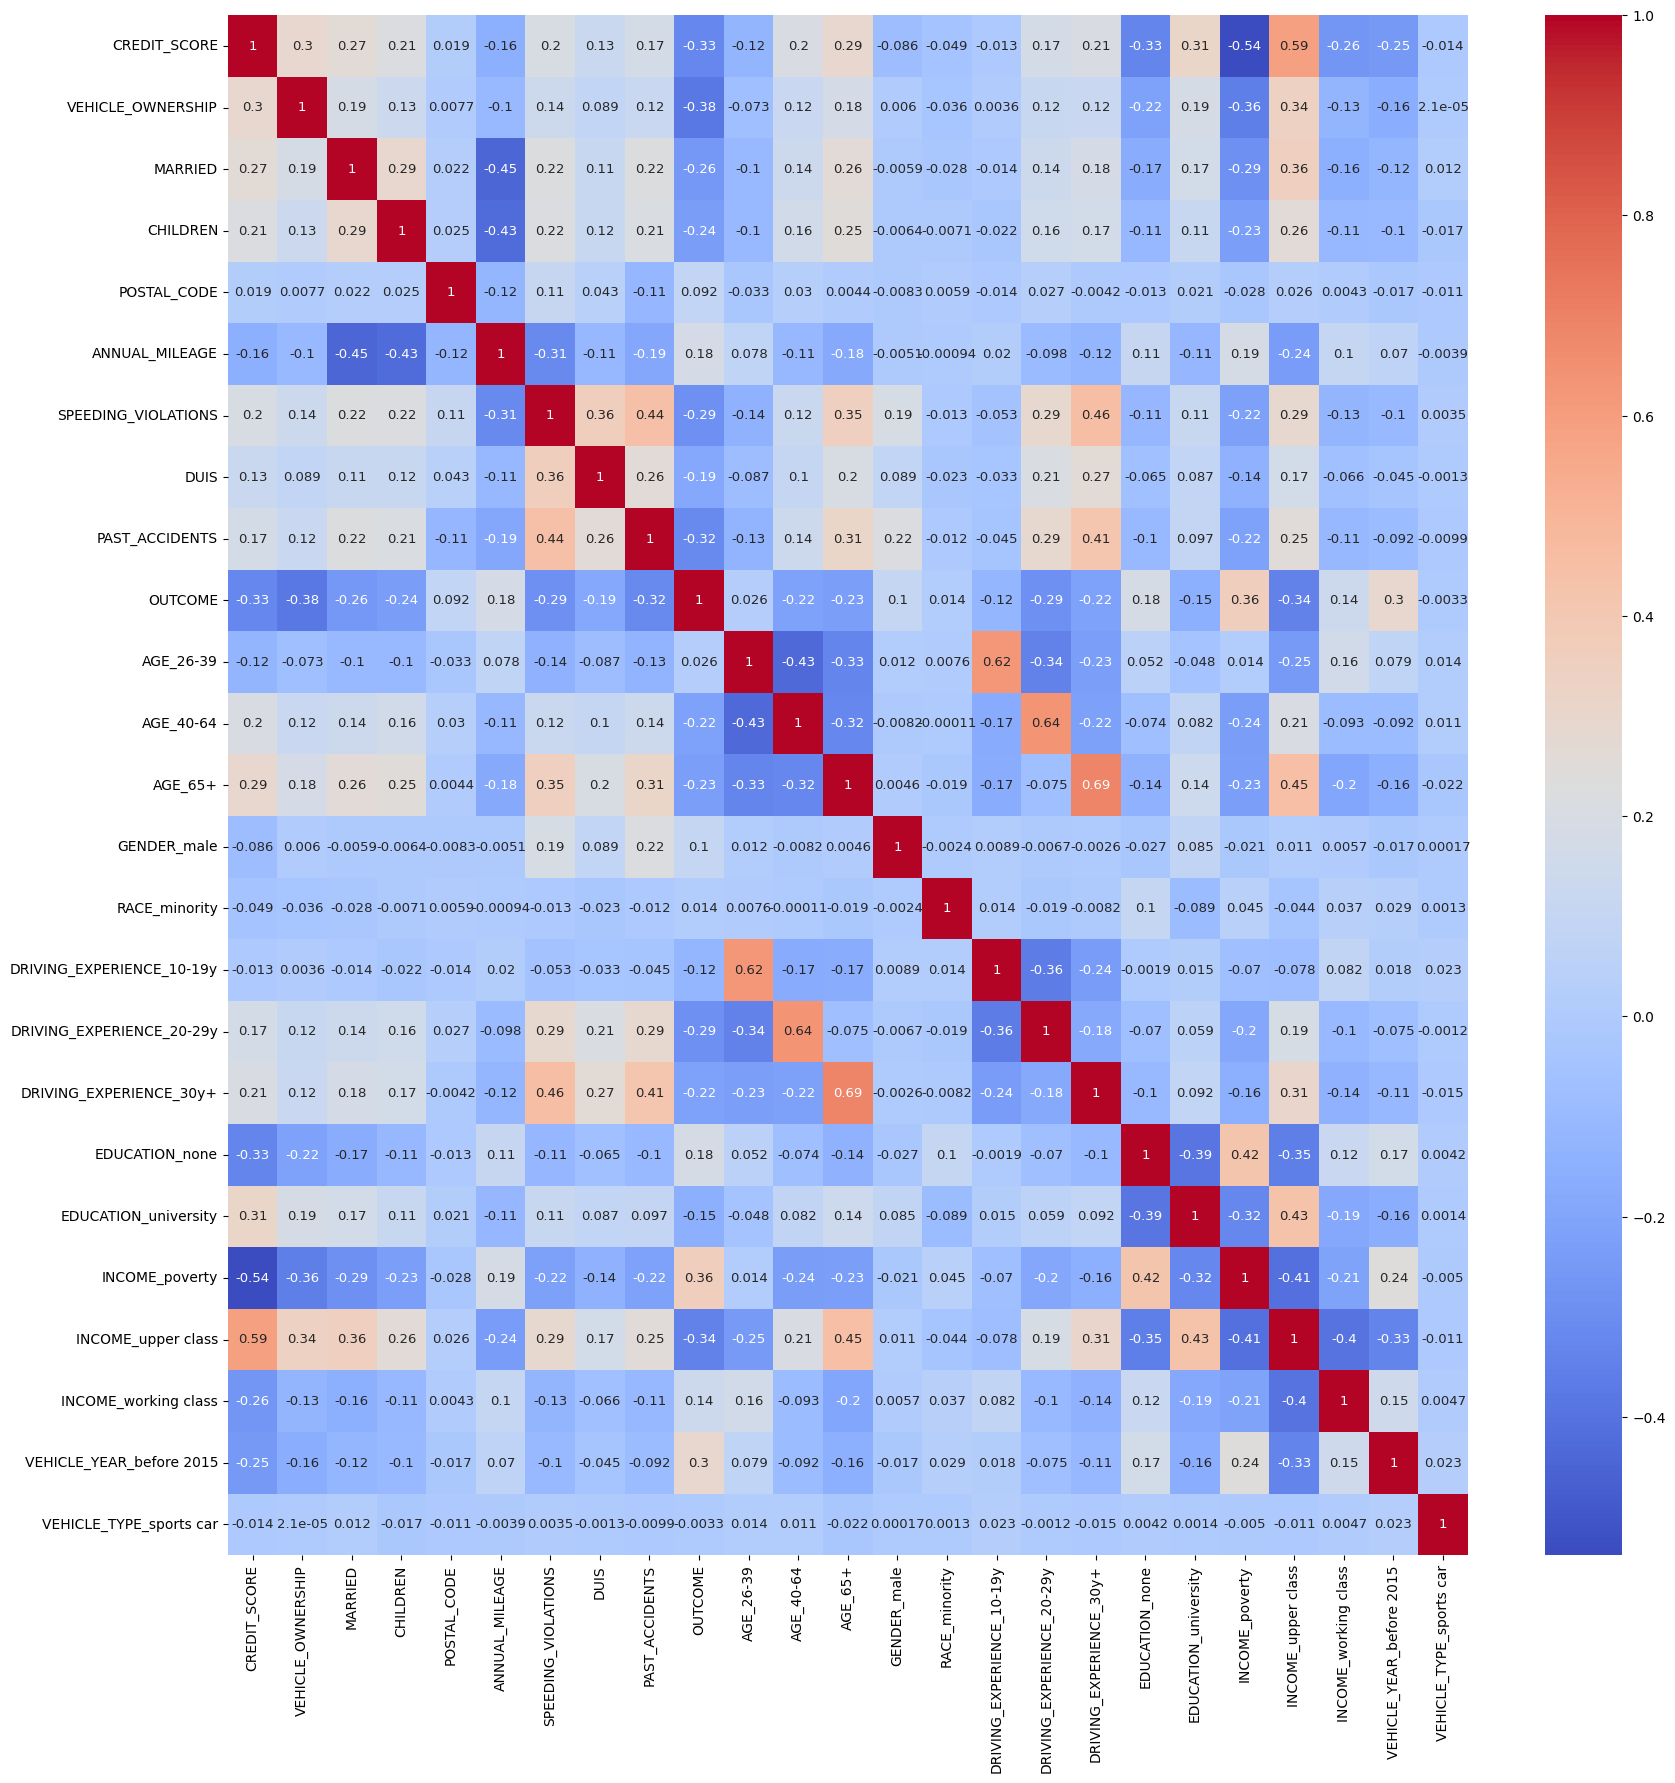

In [11]:
corr_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True,  annot_kws={"size": 9.5}, cmap='coolwarm')
plt.show()

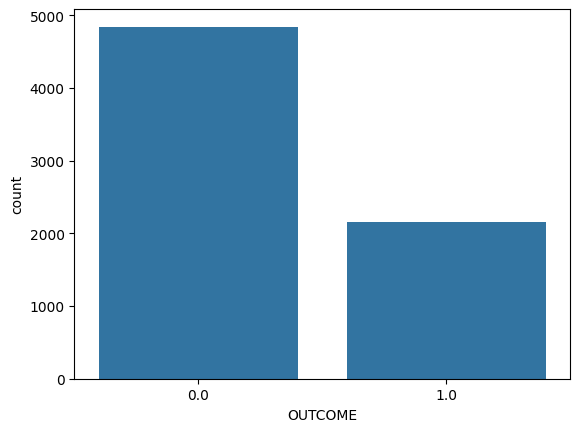

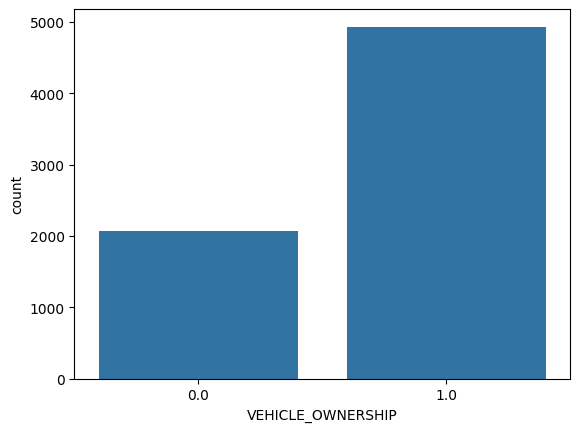

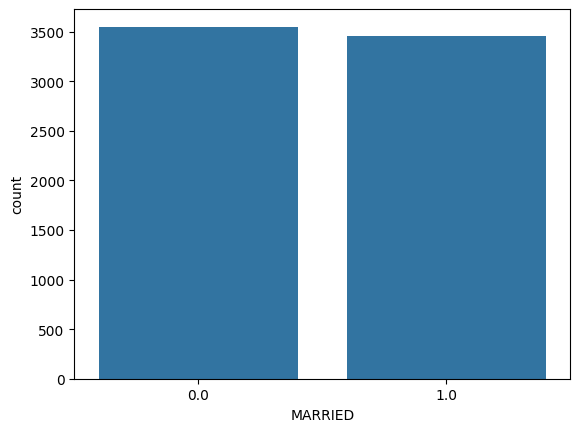

In [12]:
sns.countplot(x='OUTCOME', data=df)
plt.show()

sns.countplot(x='VEHICLE_OWNERSHIP', data=df)
plt.show()

sns.countplot(x='MARRIED', data=df)
plt.show()

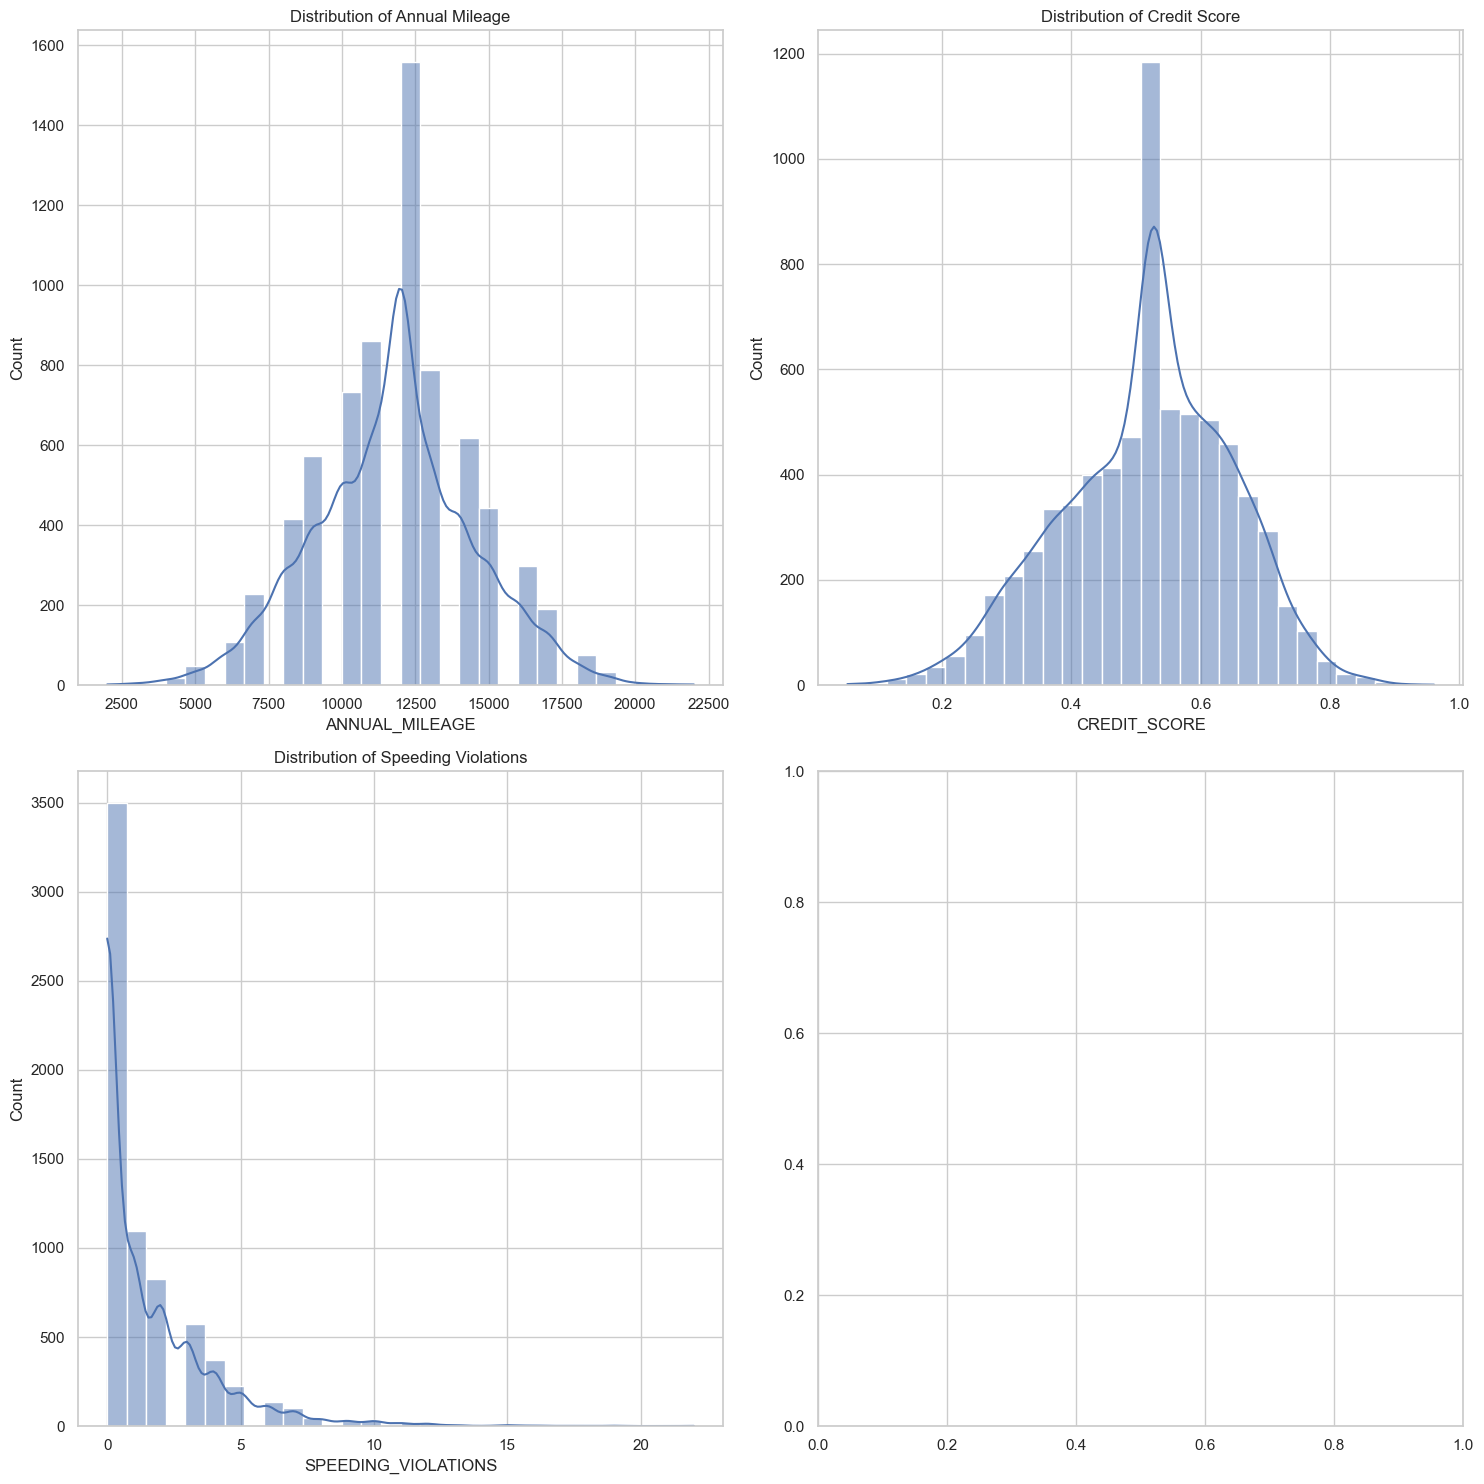

In [13]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

sns.histplot(df['ANNUAL_MILEAGE'], ax=axes[0, 0], bins=30, kde=True)
axes[0, 0].set_title('Distribution of Annual Mileage')

sns.histplot(df['CREDIT_SCORE'], ax=axes[0, 1], bins=30, kde=True)
axes[0, 1].set_title('Distribution of Credit Score')

sns.histplot(df['SPEEDING_VIOLATIONS'], ax=axes[1, 0], bins=30, kde=True)
axes[1, 0].set_title('Distribution of Speeding Violations')

plt.tight_layout()
plt.show()

&emsp;

&emsp;

# Step 3: Feature Engineering

In [62]:
df['VEHICLE_OWNERSHIP'] = df['VEHICLE_OWNERSHIP'].astype(int)
df['MARRIED'] = df['MARRIED'].astype(int)
df['CHILDREN'] = df['CHILDREN'].astype(int)
df['OUTCOME'] = df['OUTCOME'].astype(int)

In [63]:
df

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sports car
0,0.680579,1,0,1,10238,10000.0,1,1,3,0,...,True,False,False,False,False,False,True,False,True,False
1,0.578909,1,0,1,10238,9000.0,0,1,1,0,...,True,False,False,False,False,False,False,False,True,True
2,0.476437,1,1,1,32765,9000.0,5,2,1,0,...,False,True,False,False,False,False,False,False,False,False
3,0.788963,1,1,1,10238,8000.0,0,0,2,0,...,True,False,False,False,True,False,True,False,True,False
4,0.527002,0,0,0,10238,14000.0,0,1,0,0,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.429687,1,1,1,10238,10000.0,0,0,0,0,...,False,False,False,True,False,False,False,True,True,False
6996,0.438680,0,0,0,10238,15000.0,1,1,1,0,...,False,True,False,True,False,False,False,False,True,False
6997,0.527002,0,0,1,21217,12000.0,0,0,0,1,...,False,False,False,False,True,False,False,False,True,False
6998,0.603415,1,1,1,10238,5000.0,4,1,1,0,...,False,False,True,False,True,False,True,False,True,False


&emsp;

&emsp;

# Step 4: Model Building And Tuning

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [78]:
X = df.drop('OUTCOME', axis=1)
y = df['OUTCOME']
model = RandomForestClassifier(n_estimators=100, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [80]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

&emsp;

&emsp;

# Step 5: Model Evaluation

In [81]:
from sklearn.metrics import accuracy_score, classification_report

In [82]:
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8647619047619047
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1447
           1       0.80      0.75      0.78       653

    accuracy                           0.86      2100
   macro avg       0.85      0.83      0.84      2100
weighted avg       0.86      0.86      0.86      2100



&emsp;

&emsp;